In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**EDA**

In [2]:
import pandas as pd

# Load the dataset
sign_mnist_train = pd.read_csv('/content/gdrive/MyDrive/Data Preprocessing Datasets/sign_mnist_train.csv')

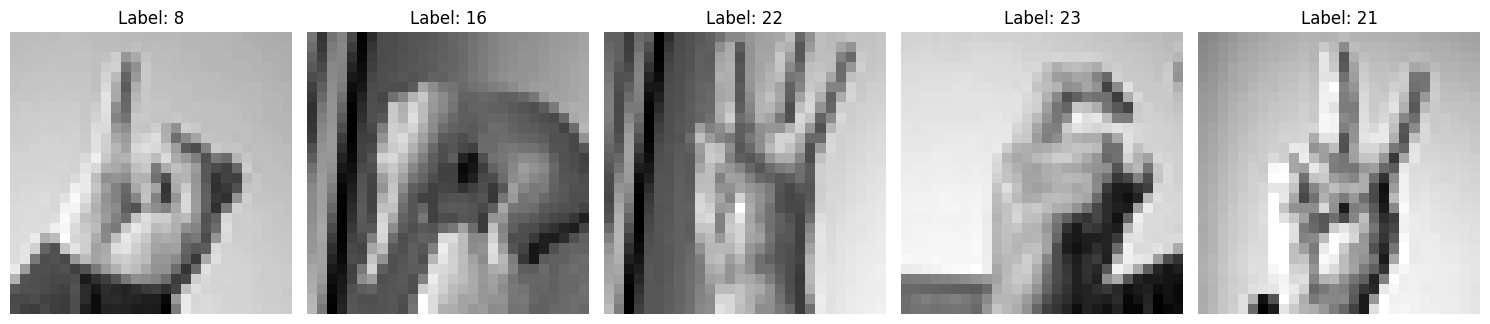

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display sample images from the dataset
def display_samples(df, n_samples=5):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 15))

    sample_data = df.sample(n_samples)
    for ax, (index, row) in zip(axes, sample_data.iterrows()):
        image = row[1:].values.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {row["label"]}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display 5 random samples from the dataset
display_samples(sign_mnist_train)


**Data Preprocessing**

In [4]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target labels
X = sign_mnist_train.drop('label', axis=1).values
y = sign_mnist_train['label'].values

In [5]:
# Reshaping data
X = X.reshape(-1, 28, 28, 1)

In [6]:
# Normalizing the data
X = X / 255.0

In [7]:
# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1599, 28, 28, 1), (400, 28, 28, 1), (1599,), (400,))

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the one-hot encoder
encoder = OneHotEncoder(sparse=False)

In [9]:
# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

# Transform the validation labels
y_val_encoded = encoder.transform(y_val.reshape(-1, 1))

y_train_encoded.shape, y_val_encoded.shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((1599, 24), (400, 24))

**Model Building**

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model using the training data (We'll use the flattened data for this model)
clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predict on the validation set
y_val_pred = clf.predict(X_val.reshape(X_val.shape[0], -1))

In [12]:
# Calculate the accuracy
accuracy = (y_val_pred == y_val).mean()

accuracy

0.7925

In [13]:
# Subsample the dataset
sample_size = int(0.3 * len(X_train))  # Taking 30% of the training data

In [14]:
X_train_subsample, y_train_subsample = X_train[:sample_size], y_train[:sample_size]

X_train_subsample.shape, y_train_subsample.shape

((479, 28, 28, 1), (479,))

**AutoML using Scikit-learn**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Redefine the set of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [19]:
# Train each model on the subsampled data and evaluate on validation set
accuracies_subsample = {}

for name, model in models.items():
    model.fit(X_train_subsample.reshape(X_train_subsample.shape[0], -1), y_train_subsample)
    accuracy = model.score(X_val.reshape(X_val.shape[0], -1), y_val)
    accuracies_subsample[name] = accuracy

accuracies_subsample

{'Logistic Regression': 0.7125,
 'Decision Tree': 0.29,
 'Random Forest': 0.5075,
 'Support Vector Machine': 0.555}